In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd

In [4]:
import pandas as pd
flights = pd.read_csv(r"C:\Users\ahisse\Documents\Flatiron\ML_Capstone\Project\sample_project\FlightDelays.csv")

In [5]:
flights.shape

(2201, 13)

In [6]:
flights.DAY_WEEK = flights.DAY_WEEK.astype('category')

flights.CRS_DEP_TIME = [round(t / 100) for t in flights.CRS_DEP_TIME]
flights.CRS_DEP_TIME = flights.CRS_DEP_TIME.astype('category')

flights['isDelayed'] = [1 if status == 'delayed' else 0 for status in flights['Flight Status']]

flights

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,isDelayed
0,15,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime,0
1,16,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime,0
2,12,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime,0
3,17,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime,0
4,10,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,6,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime,0
2197,17,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime,0
2198,16,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime,0
2199,14,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime,0


In [17]:
flights[flights['isDelayed'] > 0] #428 entries

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,isDelayed
53,15,DH,1531,LGA,229,01/02/2004,7211,IAD,0,5,2,N665BR,delayed,1
56,10,DH,1236,LGA,229,01/02/2004,7792,IAD,0,5,2,N665BR,delayed,1
62,21,DH,2305,JFK,228,01/02/2004,7814,IAD,0,5,2,N657BR,delayed,1
96,12,DH,1350,EWR,213,01/02/2004,7303,IAD,0,5,2,N686BR,delayed,1
97,14,DH,1512,EWR,213,01/02/2004,7307,IAD,0,5,2,N309UE,delayed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,15,RU,1601,EWR,199,1/30/2004,2261,DCA,0,5,30,N13979,delayed,1
2149,15,RU,1456,EWR,213,1/30/2004,2156,IAD,0,5,30,N21144,delayed,1
2150,7,RU,659,EWR,213,1/30/2004,2855,IAD,0,5,30,N11121,delayed,1
2156,8,DH,931,JFK,228,1/31/2004,7800,IAD,0,6,31,N655BR,delayed,1


In [7]:
predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER', 'Weather']
outcome = 'isDelayed'

X = pd.get_dummies(flights[predictors], drop_first=True)
y = flights[outcome]
classes = ['ontime', 'delayed']

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(flights['Flight Status'])
y

array([1, 1, 1, ..., 1, 1, 1])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Create Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0, criterion="entropy")

In [11]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
print('Accuracy on training set:',tree.score(X_train, y_train))

Accuracy on training set: 0.8579545454545454


In [13]:
# Evaluating Test Set

y_pred = tree.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy on test set:",accuracy_score(y_pred, y_test))

Accuracy on test set: 0.7505668934240363


In [1]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X_test, y_test)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\ahisse\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [16]:
tree_pruned = DecisionTreeClassifier(max_depth=6, random_state=0, criterion= "entropy")
tree_pruned.fit(X_train, y_train)
y_pruned_pred = tree_pruned.predict(X_test)

In [17]:
#Accuracy Score
print("Accuracy on training set:",tree_pruned.score(X_train, y_train).round(3))
print("Accuracy on test set:",accuracy_score(y_pruned_pred, y_test))

Accuracy on training set: 0.827
Accuracy on test set: 0.8027210884353742


In [18]:
# variable importance 
importance = pd.DataFrame(tree_pruned.feature_importances_, index = X.columns, columns = ["Importance"])
importance.sort_values(by = "Importance", ascending = False)

,Importance
Weather,0.344708
DEST_JFK,0.141464
CARRIER_US,0.140841
DAY_WEEK_6,0.076496
DAY_WEEK_7,0.062101
CARRIER_DL,0.060845
CARRIER_DH,0.029698
CRS_DEP_TIME_8,0.028992
CRS_DEP_TIME_9,0.027543
DAY_WEEK_3,0.019013


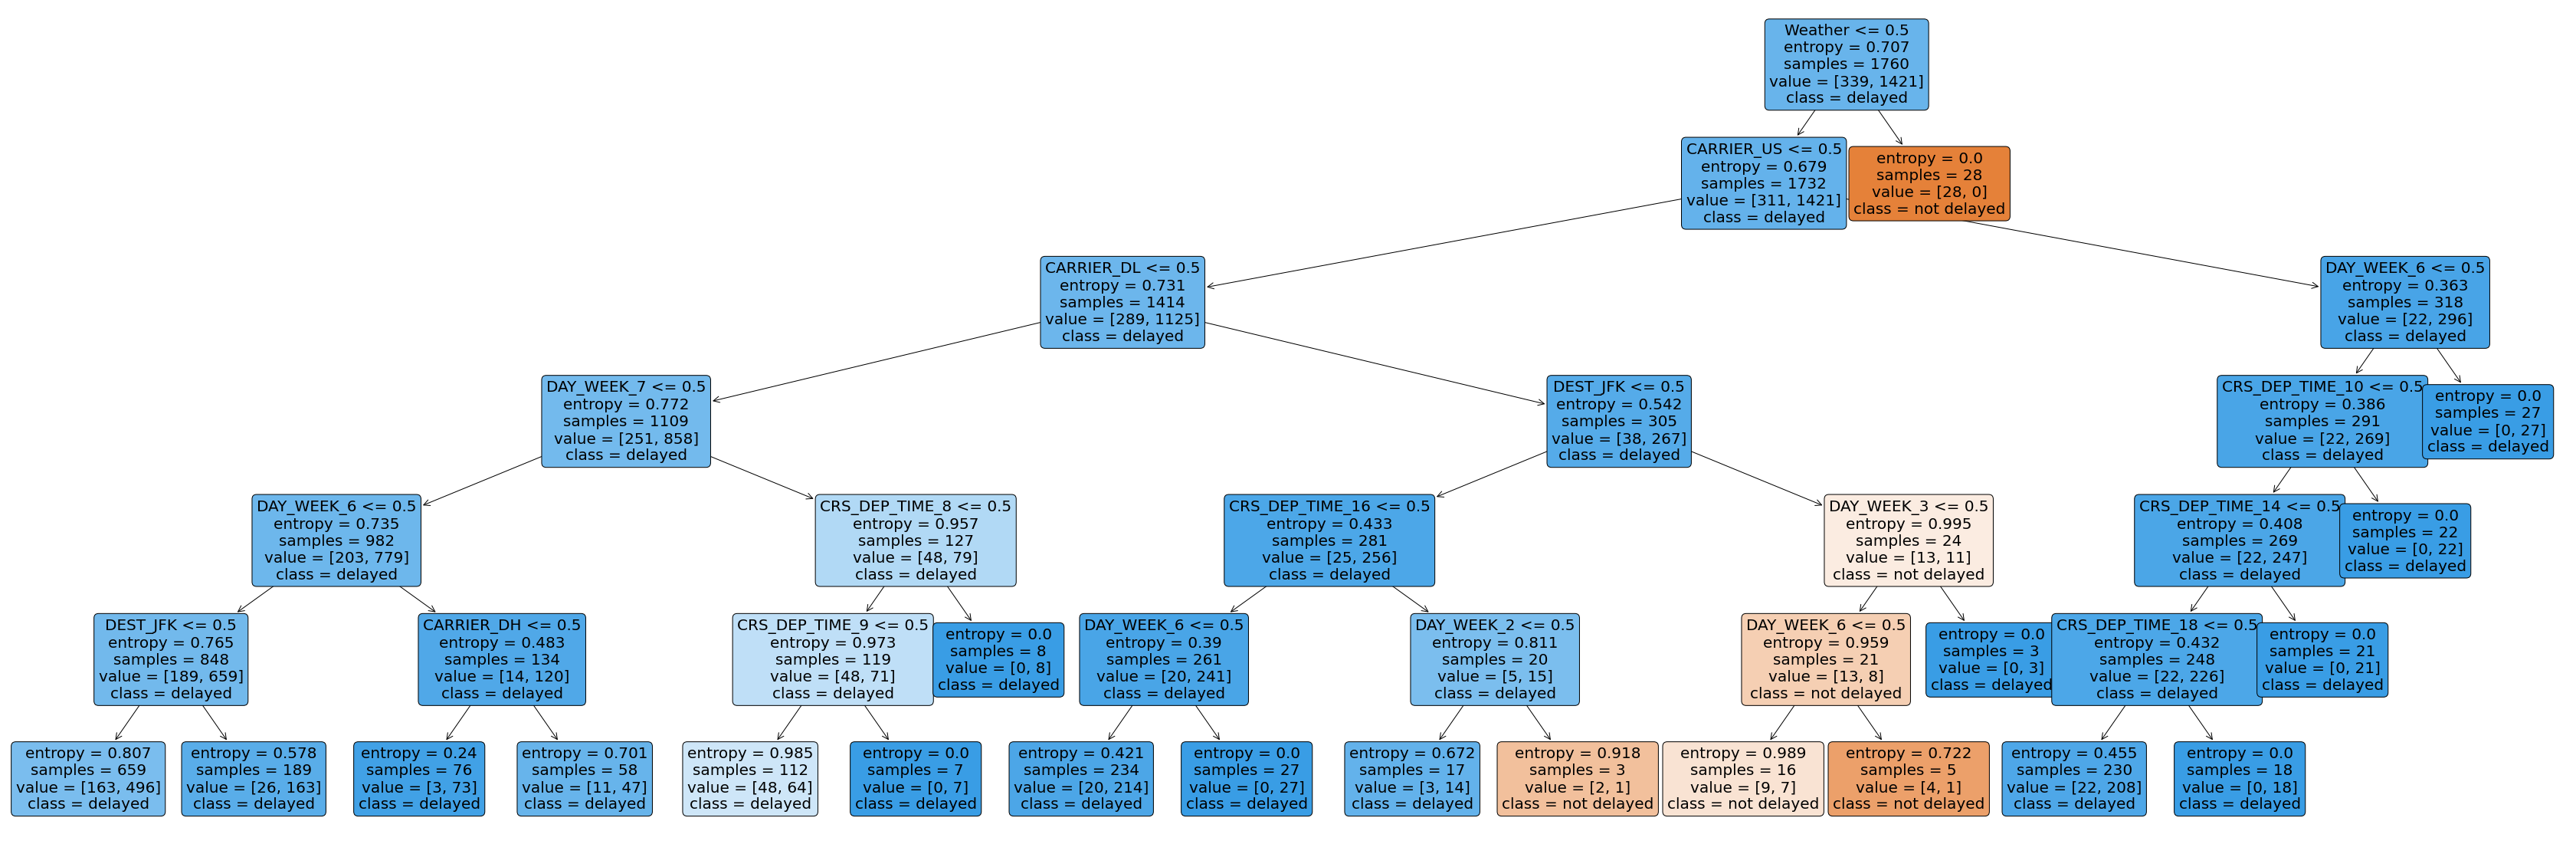

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(60,20))
display_tree = plot_tree(tree_pruned, 
              feature_names=X_train.columns, 
              class_names=["not delayed", "delayed"], 
              filled=True, 
              rounded=True,
              fontsize=20)

In [20]:
tree_pruned.predict_proba(X_test)

array([[0.08547009, 0.91452991],
       [0.24734446, 0.75265554],
       [0.42857143, 0.57142857],
       [0.24734446, 0.75265554],
       [0.24734446, 0.75265554],
       [0.03947368, 0.96052632],
       [0.24734446, 0.75265554],
       [0.09565217, 0.90434783],
       [0.24734446, 0.75265554],
       [0.09565217, 0.90434783],
       [0.24734446, 0.75265554],
       [0.24734446, 0.75265554],
       [0.24734446, 0.75265554],
       [0.08547009, 0.91452991],
       [0.03947368, 0.96052632],
       [0.        , 1.        ],
       [0.08547009, 0.91452991],
       [0.03947368, 0.96052632],
       [0.18965517, 0.81034483],
       [0.24734446, 0.75265554],
       [0.08547009, 0.91452991],
       [0.03947368, 0.96052632],
       [0.24734446, 0.75265554],
       [0.08547009, 0.91452991],
       [0.24734446, 0.75265554],
       [0.24734446, 0.75265554],
       [0.08547009, 0.91452991],
       [0.13756614, 0.86243386],
       [0.18965517, 0.81034483],
       [0.09565217, 0.90434783],
       [0.

In [21]:
y_pruned_pred_proba = tree_pruned.predict_proba(X_test)[:,1]

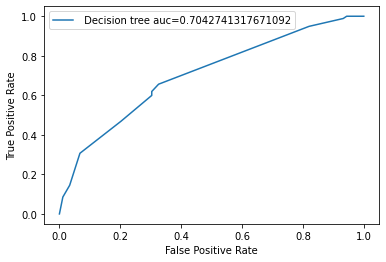

In [22]:
from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, _ = metrics.roc_curve(y_test, y_pruned_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pruned_pred_proba)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
plt.show()